In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input

In [2]:
#fix random seed-1 (or whatever other integer) for reproductibility
seed = 7
np.random.seed(seed)

In [3]:
#Generate data
N = 1000
X_train = np.linspace(0.0,1.0,N)
y_train = np.sin(2*np.pi*X_train)

X_val = np.random.rand(100)
X_val = np.sort(X_val)
y_val = np.sin(2*np.pi*X_val)

In [4]:
#Define model
function_1 = Dense(32,activation = 'sigmoid',kernel_initializer = "uniform",input_dim = 1)  
function_2 = Dense(32, activation = 'sigmoid', kernel_initializer = "uniform")
function_3 = Dense(1, kernel_initializer = "uniform")

x0 = Input(shape = (1,))
x1 = function_1(x0)
x2 = function_2(x1)
x3 = function_3(x2)
model = Model(inputs = x0, outputs = x3)
model.compile(optimizer = 'rmsprop', loss = 'mse',metrics = ['mse'])
hist = model.fit(X_train,y_train,epochs = 400, batch_size = 32,verbose = 0,validation_data = (X_val,y_val))
    

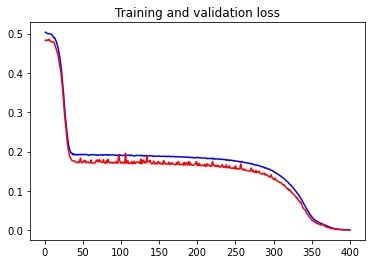

In [5]:
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_loss,'b-')
plt.plot(ep,valid_loss,'r-')
plt.title('Training and validation loss')
plt.show()